## Maximum Likelihood Estimation

- 정의
    - observation을 가장 잘 설명하는 theta를 찾음
    - 기울기를 구함

## Basic Approach to Train DNN
1. 모델을 만든다
2. 오버핏되었는지 본다
- 오버핏되지 않으면 모델을 더 깊게 만든다
- 오버핏 되었으면 정규화를 한다
3. 2를 반복한다 

In [1]:
%matplotlib inline

In [2]:
batch_size = 128

In [3]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
mnist_train = dsets.MNIST(root="MNIST_data/", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dsets.MNIST(root="MNIST_data/", train=False, transform=transforms.ToTensor(), download=True)
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [4]:
import random
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [5]:
linear = torch.nn.Linear(28*28, 10, bias=True).to(device)
training_epochs = 15
batch_size = 100
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(linear.parameters(), lr=0.1)


for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)
    for X, y in data_loader:
        X = X.view(-1, 28*28).to(device)
        y = y.to(device)
        optimizer.zero_grad()
        y_pred = linear(X)
        cost = criterion(y_pred, y)
        cost.backward()
        optimizer.step()
        avg_cost += cost / total_batch
    print(f"Epoch : {epoch + 1}/{training_epochs}, cost = {avg_cost:4f}")
        

Epoch : 1/15, cost = 0.817749
Epoch : 2/15, cost = 0.795295
Epoch : 3/15, cost = 0.821199
Epoch : 4/15, cost = 0.900564
Epoch : 5/15, cost = 0.877503
Epoch : 6/15, cost = 0.899776
Epoch : 7/15, cost = 0.914898
Epoch : 8/15, cost = 0.886415
Epoch : 9/15, cost = 0.954749
Epoch : 10/15, cost = 0.854691
Epoch : 11/15, cost = 0.877985
Epoch : 12/15, cost = 0.905653
Epoch : 13/15, cost = 0.922121
Epoch : 14/15, cost = 0.846673
Epoch : 15/15, cost = 0.887854


Accuracy: 0.8615999817848206
Label:  8
Prediction:  3


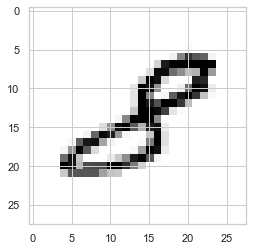

In [6]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()